In [ ]:
import pandas as pd
df=messages = pd.read_csv('/content/drive/MyDrive/reviews.txt', sep='\t',
                           names=["Reviews", "Comments"])
df.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model = model.to('cpu')


In [ ]:
model.save_pretrained("./sentiment")

In [ ]:
sample_data = ["I am eating","I am playing "]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 1045, 2572, 5983, 102], [101, 1045, 2572, 2652, 102]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]}

In [ ]:
X = list(df["Comments"])
y = list(df["Reviews"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
len(X_train),len(X_val)

(5668, 1418)

In [ ]:

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
train_dataset[5]

{'input_ids': tensor([  101,  2004,  1045,  4133,  2182,  1010,  3666,  1996,  8692,  3185,
          2982,  1010,  1045,  2572,  6966,  1997,  2129,  2172,  1045, 26626,
          1996,  3185,  3631,  5963,  3137,  1012,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor(0)}

In [ ]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
!pip install accelerate -U

In [ ]:
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=1,
    per_device_train_batch_size=16

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=355, training_loss=0.04600911207602058, metrics={'train_runtime': 66.9879, 'train_samples_per_second': 84.612, 'train_steps_per_second': 5.299, 'total_flos': 171850574697360.0, 'train_loss': 0.04600911207602058, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.02687573991715908,
 'eval_accuracy': 0.995768688293371,
 'eval_precision': 0.9962453066332916,
 'eval_recall': 0.9962453066332916,
 'eval_f1': 0.9962453066332916,
 'eval_runtime': 4.484,
 'eval_samples_per_second': 316.233,
 'eval_steps_per_second': 39.696,
 'epoch': 1.0}

In [ ]:
trainer.save_model('model0')

In [ ]:
#trainer.save_model("/content/drive/MyDrive")
model0=BertForSequenceClassification.from_pretrained("/content/drive/MyDrive")
model0.to('cpu')


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
text = "Inception was the best movie i ever watched"

inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cpu')
outputs = model0(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions

SequenceClassifierOutput(loss=None, logits=tensor([[-4.4085,  4.5736]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[1.2563e-04, 9.9987e-01]], grad_fn=<SoftmaxBackward0>)


array([[0.00012563, 0.99987435]], dtype=float32)

In [ ]:
import torch
import numpy as np


text = "This movie truly is one of the greats! Even with its age, it still manages to be one of the most scariest movies ever made. The filming, writing, and acting is a masterpiece. Highly recommend this movie if you are an avid horror lover. This is a classic must see!"


# Tokenize the input text
inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt').to('cpu')

# Pass the tokenized input through the model
outputs = model0(**inputs)

# Apply softmax to convert the logits into probabilities
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Convert the predictions to a NumPy array
predictions = predictions.cpu().detach().numpy()

# Set a threshold for classification (e.g., 0.5)
threshold = 0.5

# Classify comments as positive or negative based on the threshold
predicted_class = "Positive" if predictions[0, 0] < threshold else "Negative"

# Print the original predictions and the final classification
print(f"Original Predictions: {predictions}")
print(f"The predicted class is: {predicted_class}")


Original Predictions: [[0.00002469 0.9999753 ]]
The predicted class is: Positive


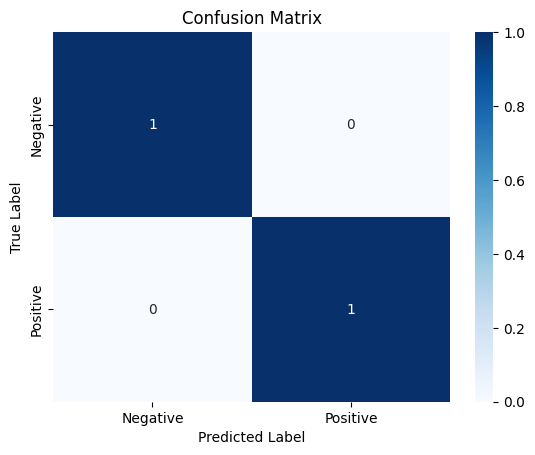

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions and true labels
predictions = np.array([[0.8, 0.2], [0.3, 0.7]])
true_labels = np.array([1, 0])

# Threshold for classification (adjust as needed)
threshold = 0.5
predicted_labels = (predictions[:, 0] > threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming you have predictions and true labels
predictions = np.array([[0.8, 0.2], [0.3, 0.7]])
true_labels = np.array([1, 0])

# Threshold for classification (adjust as needed)
threshold = 0.5
predicted_labels = (predictions[:, 0] > threshold).astype(int)

# Calculate accuracy in percentage
accuracy = accuracy_score(true_labels, predicted_labels) * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 100.00%
